In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

happiness_data = pd.read_csv('D:\DATA SCIENCE Experiments\Happiness Index.csv')

print(happiness_data.head())
duplicatesValues = happiness_data.duplicated()
print(duplicatesValues.sum())
happiness_data[duplicatesValues]

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


<Axes: xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

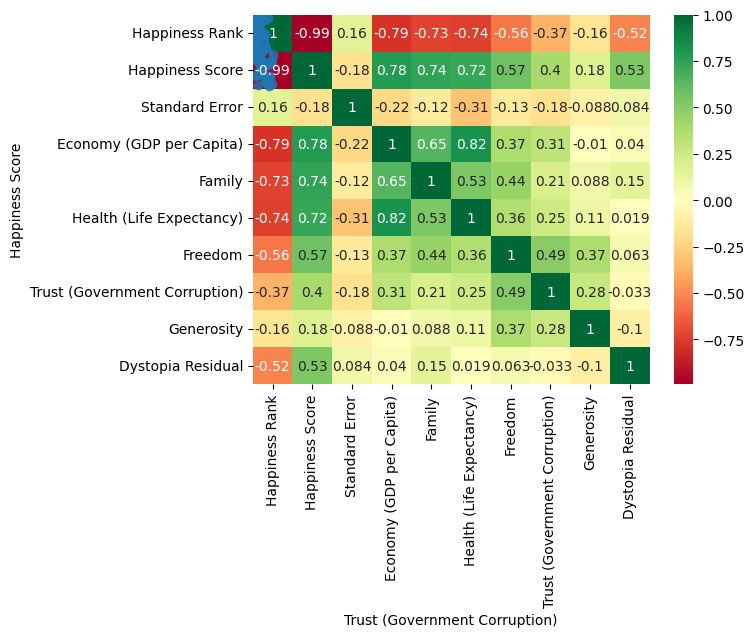

In [6]:
#Normalizing and Scaling
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()
stdScale
happiness_data['Happiness Score'] = stdScale.fit_transform(happiness_data[['Happiness Score']])
happiness_data.head()


#Correlation
sns_plot = sns.heatmap(happiness_data.corr(numeric_only=True),annot=True,cmap='RdYlGn')

#regrerssion
#sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score',data=happiness_data)
sns.regplot(x ='Trust (Government Corruption)',y='Happiness Score',data=happiness_data)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_28552\588056697.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2021-01-01', end='2023-01-01', freq='M')


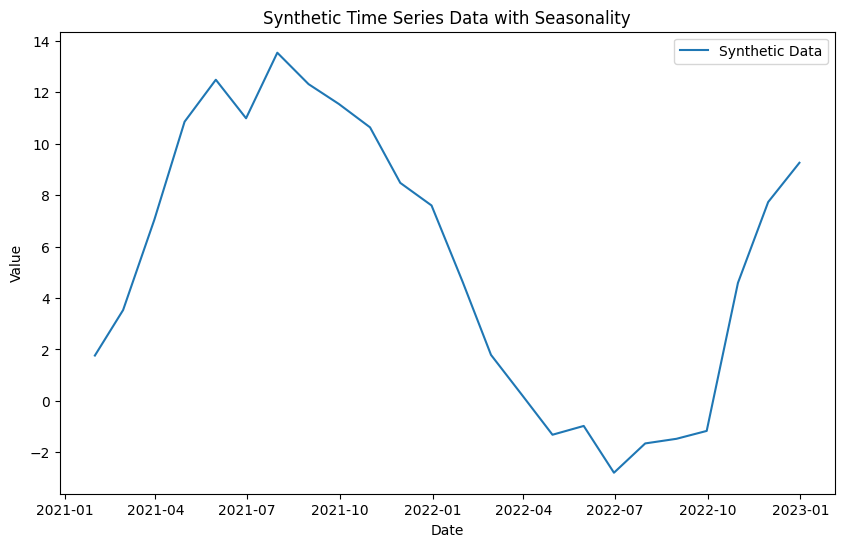

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_28552\588056697.py:38: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('D:\Power BI thing\Forage Data sets\JPMC Data analyst\ime_series_data.csv', index_col='Date', parse_dates=True)
c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Nikhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate s

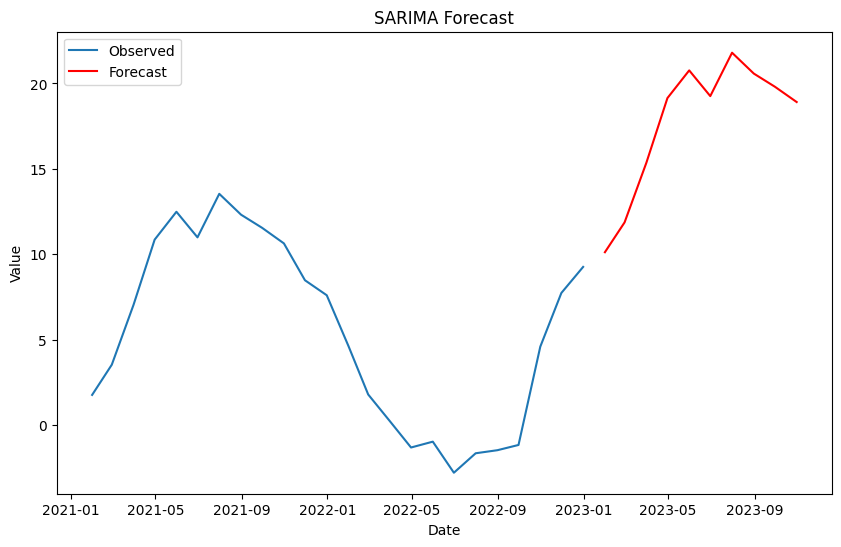

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate a time range
date_range = pd.date_range(start='2021-01-01', end='2023-01-01', freq='M')

# Create synthetic data with seasonality
seasonal_effect = 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))
trend = np.linspace(0, 10, len(date_range))
noise = np.random.normal(loc=0, scale=1, size=len(date_range))
data = trend + seasonal_effect + noise

# Create DataFrame
df = pd.DataFrame(data, index=date_range, columns=['Value'])

# Plot synthetic data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Synthetic Data')
plt.title('Synthetic Time Series Data with Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Save the data to CSV
#df.to_csv('D:\Power BI thing\Forage Data sets\JPMC Data analyst\ime_series_data.csv')

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the synthetic data
data = pd.read_csv('D:\Power BI thing\Forage Data sets\JPMC Data analyst\ime_series_data.csv', index_col='Date', parse_dates=True)
series = data['Value']

# Fit SARIMA model
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()